# Peak Terrorism Attacks in South America

## Dataset can be found from: https://www.start.umd.edu/gtd

### Question: When were terrorism attacks at an all time high in South America and who did it affect? Why?


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [289]:
Terrorism = pd.read_csv("EDAGlobalTerrorism.csv",encoding='latin1')

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [290]:
Terrorism.head()

,ï»¿eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [291]:
Terrorism.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day',
                   'extended':'Extended', 'country_txt':'Country',
                   'provstate':'state', 'region_txt':'Region',
                   'attacktype1_txt':'AttackType', 'target1':'Target',
                   'nkill':'Killed', 'nwound':'Wounded', 'summary':'Summary',
                   'gname':'Group', 'targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type', 'motive':'Motive'}, inplace=True)

In [292]:
NewTerrorism = Terrorism[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [293]:
NewTerrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         201183 non-null  int64  
 1   Month        201183 non-null  int64  
 2   Extended     201183 non-null  int64  
 3   Day          201183 non-null  int64  
 4   Country      201183 non-null  object 
 5   state        201183 non-null  object 
 6   Region       201183 non-null  object 
 7   city         200757 non-null  object 
 8   latitude     196556 non-null  float64
 9   longitude    196555 non-null  float64
 10  AttackType   201183 non-null  object 
 11  Killed       189233 non-null  float64
 12  Wounded      182259 non-null  float64
 13  Target       200548 non-null  object 
 14  Summary      135062 non-null  object 
 15  Group        201183 non-null  object 
 16  Target_type  201183 non-null  object 
 17  Weapon_type  201183 non-null  object 
 18  Motive       53629 non-n

In [294]:
NewTerrorism.columns

Index(['Year', 'Month', 'Extended', 'Day', 'Country', 'state', 'Region',
       'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

## Correlation and Covariance

In [295]:
corr_mat = NewTerrorism.corr()
corr_mat

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
Year,1.000000,-0.004820,0.099480,0.018148,0.143672,0.536558,0.015135,0.009853
Month,-0.004820,1.000000,0.000359,0.006866,-0.012712,-0.003412,0.004944,0.002865
Extended,0.099480,0.000359,1.000000,-0.004845,-0.033986,0.029282,0.034372,-0.004912
Day,0.018148,0.006866,-0.004845,1.000000,0.002965,0.012975,-0.003754,-0.001471
latitude,0.143672,-0.012712,-0.033986,0.002965,1.000000,0.253286,-0.015853,0.014430
longitude,0.536558,-0.003412,0.029282,0.012975,0.253286,1.000000,-0.000200,0.011866
Killed,0.015135,0.004944,0.034372,-0.003754,-0.015853,-0.000200,1.000000,0.537443
Wounded,0.009853,0.002865,-0.004912,-0.001471,0.014430,0.011866,0.537443,1.000000


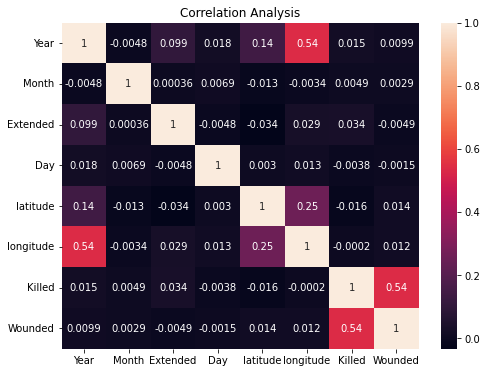

In [296]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Analysis')
plt.savefig('correlation.png')
plt.show()

In [297]:
cov_mat = NewTerrorism.cov()
cov_mat

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
Year,180.350957,-0.219244,0.290933,2.146795,34.978287,405.726696,2.231360,5.323695
Month,-0.219244,11.474317,0.000265,0.204856,-0.784768,-0.654132,0.188388,0.405052
Extended,0.290933,0.000265,0.047424,-0.009294,-0.134088,0.358830,0.073874,-0.037715
Day,2.146795,0.204856,-0.009294,77.589273,0.475753,6.466094,-0.371813,-0.540250
latitude,34.978287,-0.784768,-0.134088,0.475753,332.121059,261.275298,-3.201934,10.947272
longitude,405.726696,-0.654132,0.358830,6.466094,261.275298,3203.895264,-0.124910,28.152279
Killed,2.231360,0.188388,0.073874,-0.371813,-3.201934,-0.124910,126.613991,214.987407
Wounded,5.323695,0.405052,-0.037715,-0.540250,10.947272,28.152279,214.987407,1741.302758


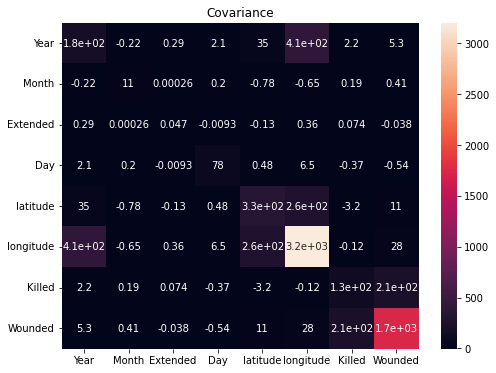

In [298]:
fig,axes = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(cov_mat, annot=True)
plt.title('Covariance')
plt.savefig('covariance.png')
plt.show()

## Fatal and Non-Fatal Injuries from terrorist attacks between the 1970s to 2019

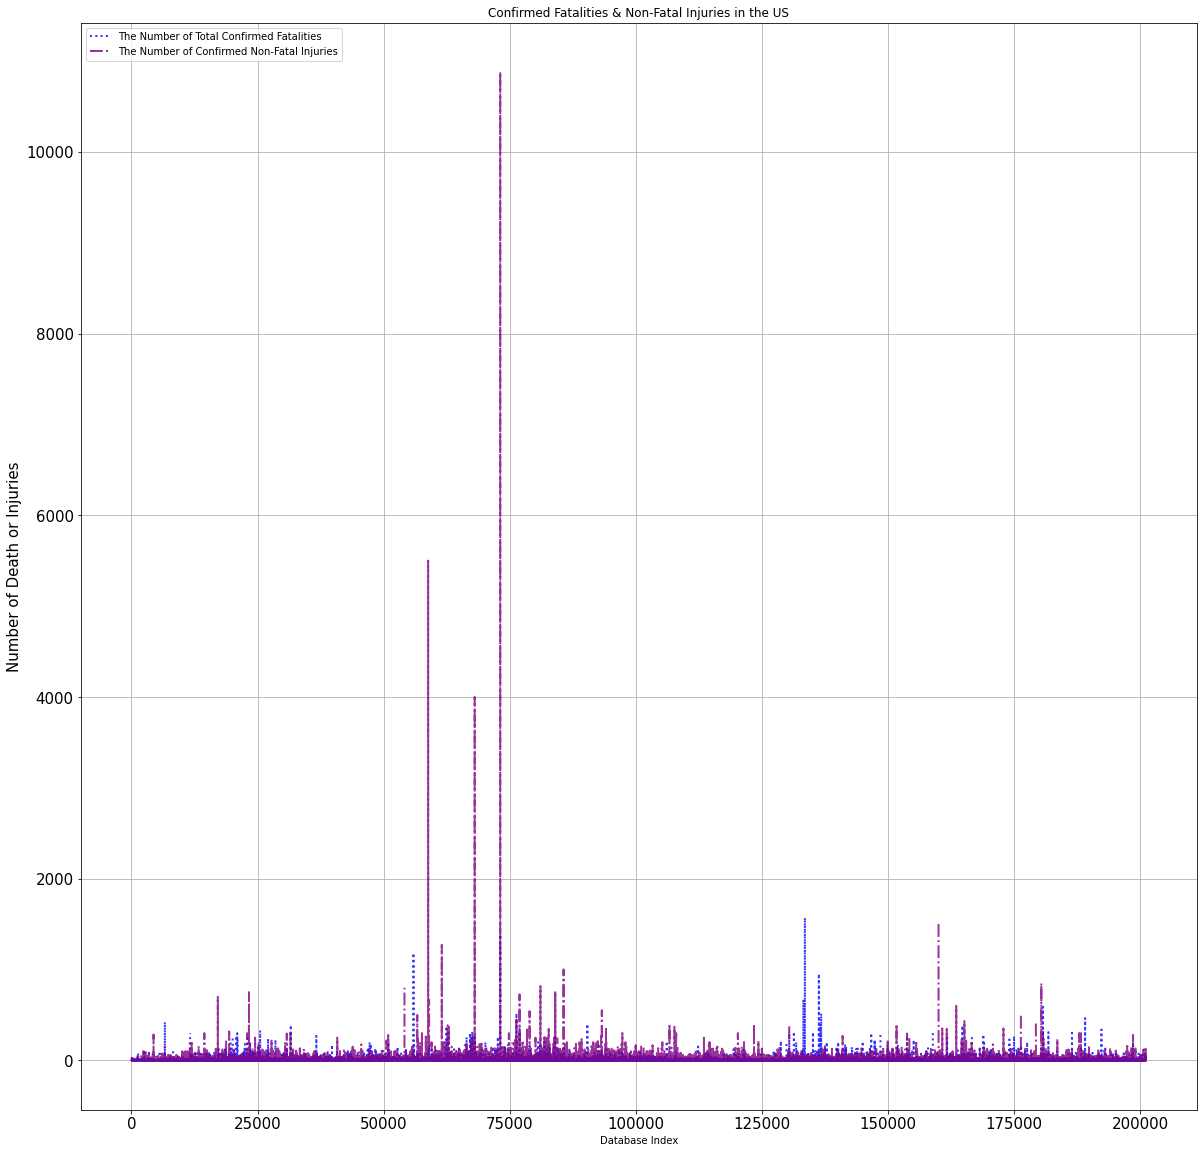

In [299]:
NewTerrorism.Killed.plot(kind = 'line', color = 'blue', label = 'The Number of Total Confirmed Fatalities', linewidth = 2, alpha = 0.8, grid = True, 
                linestyle = ':', figsize = (20,20), fontsize=15)
NewTerrorism.Wounded.plot(color = "purple", label = 'The Number of Confirmed Non-Fatal Injuries', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)
plt.legend(loc='upper left')     
plt.xlabel('Database Index', fontsize=10)             
plt.ylabel('Number of Death or Injuries', fontsize=15)
plt.title('Confirmed Fatalities & Non-Fatal Injuries in the US')         
plt.show()

### Death and injures from the 1970s to 2019

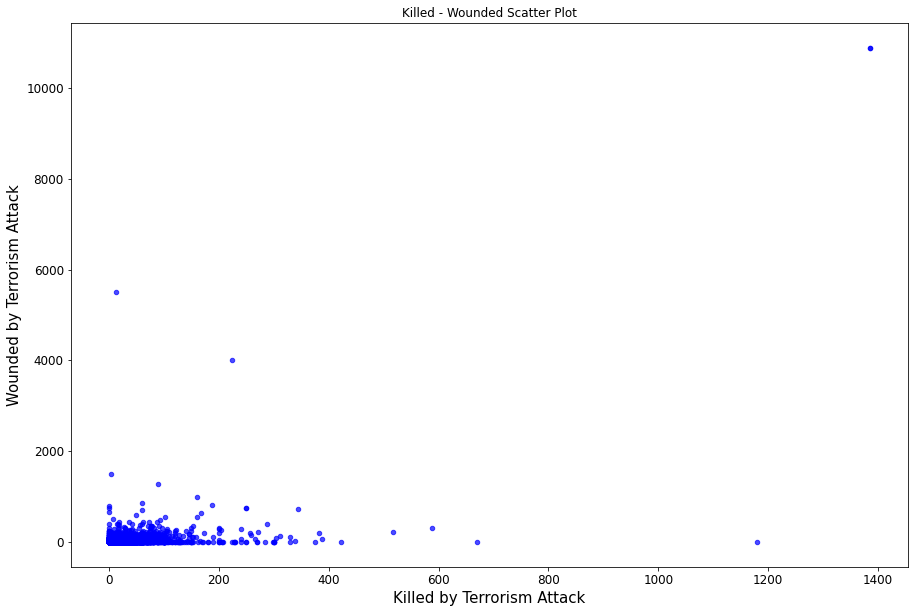

In [300]:
NewTerrorism.plot(kind = 'scatter', x = 'Killed', y = 'Wounded', alpha = 0.7, color = 'blue', figsize = (15,10), fontsize=12)
plt.xlabel('Killed by Terrorism Attack', fontsize=15)
plt.ylabel('Wounded by Terrorism Attack', fontsize=15)
plt.title('Killed - Wounded Scatter Plot')
plt.show()

### Mortailty and injury were low, but some actions did lead to a large amount of death and injuries

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Extended'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'Killed'}>,
        <AxesSubplot:title={'center':'Wounded'}>, <AxesSubplot:>]],
      dtype=object)

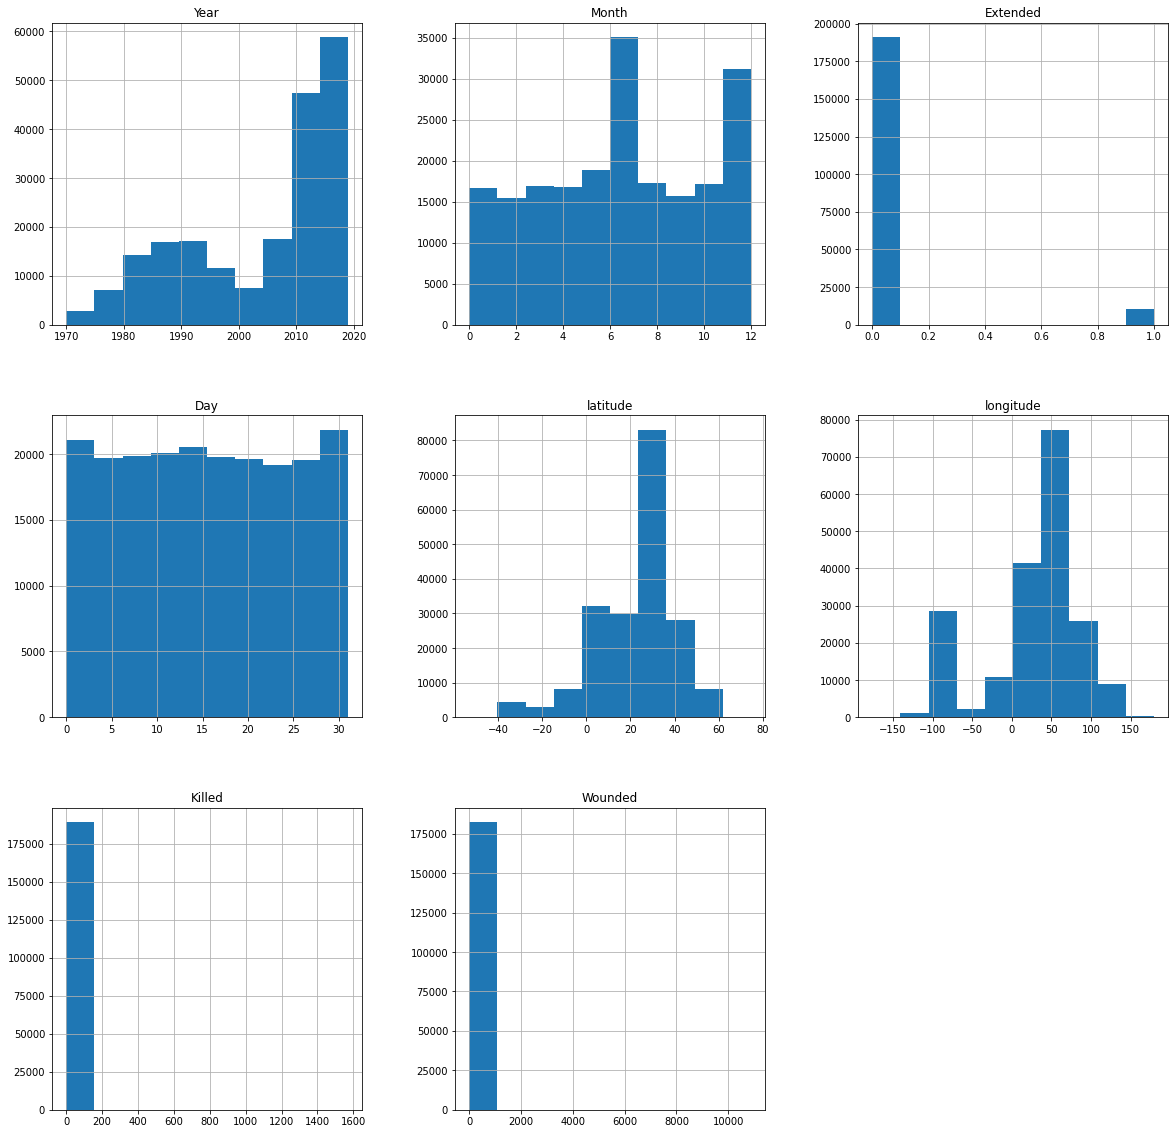

In [301]:
NewTerrorism.hist(figsize=(20,20))

## Analyzing South America

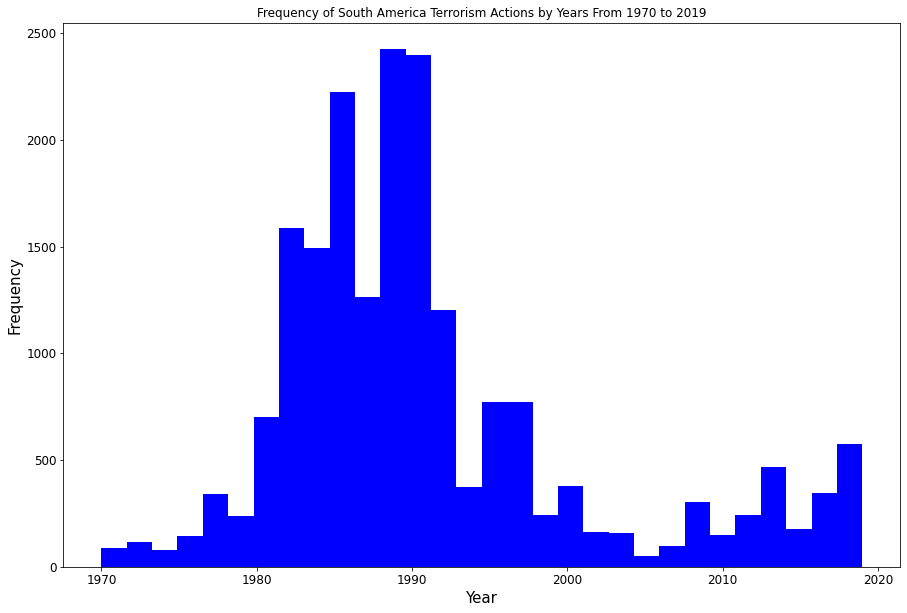

In [302]:
SouthAmericaData = Terrorism[Terrorism['region'] == 3]
SouthAmericaData.Year.plot(kind = 'hist', bins = 30, figsize = (15,10), color = 'blue', fontsize=12)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of South America Terrorism Actions by Years From 1970 to 2019')
plt.show()

### The rate of terrorism of acts increased rapidly after the year 1980 but decreased after the 2000's.

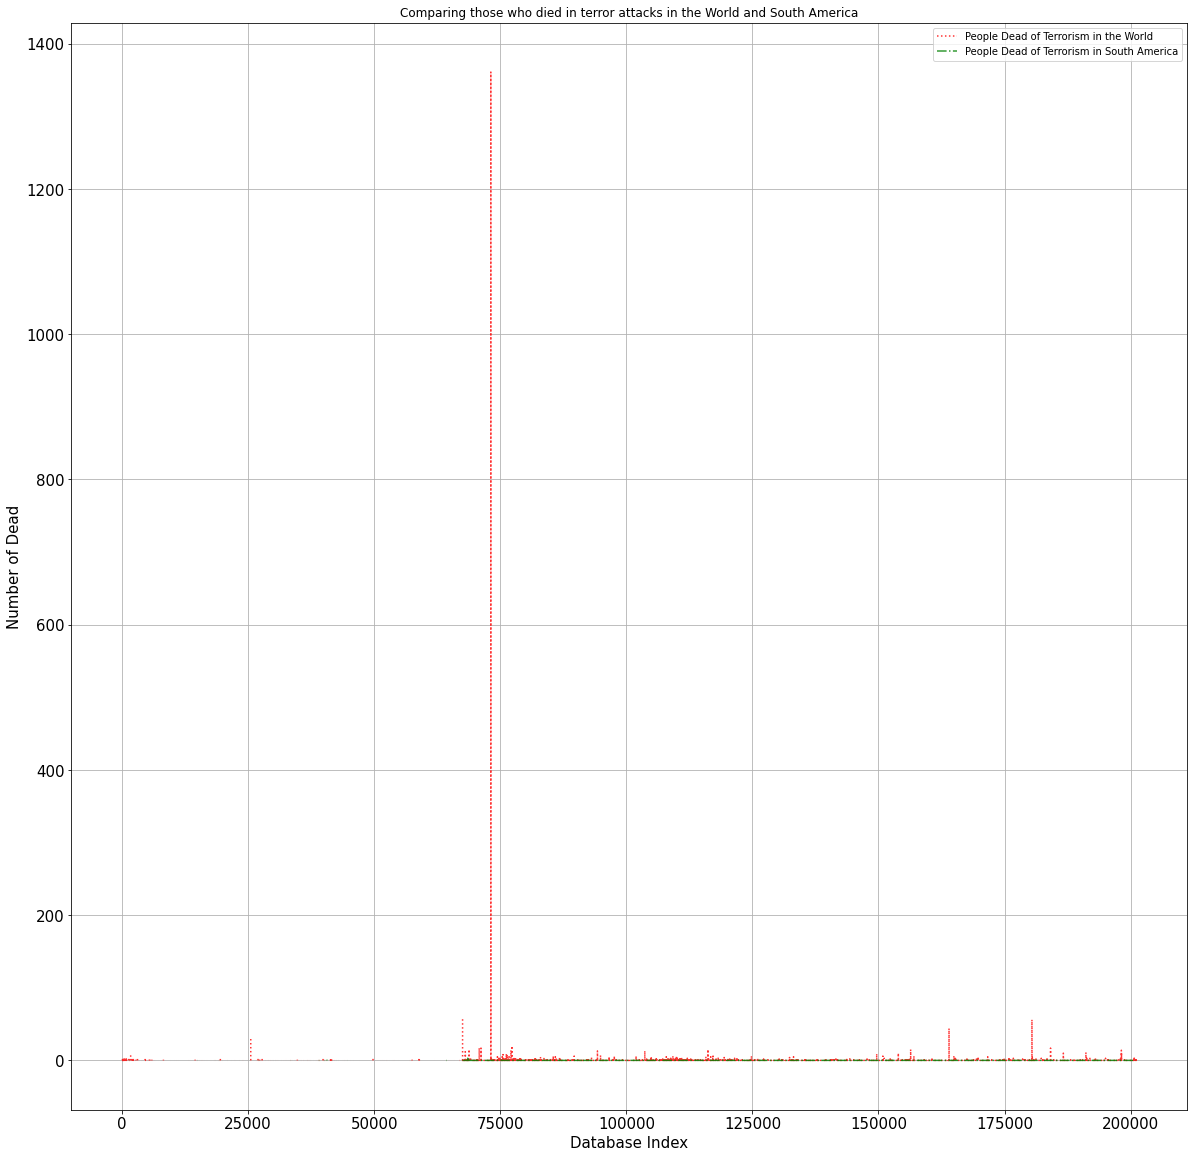

In [303]:
Terrorism.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
SouthAmericaData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in South America', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and South America')            #plot title
plt.show()


## Terror Attacks of in the peak year of 1990 and where the attacks occured. 

In [304]:
filterYear = SouthAmericaData['Year'] == 1990

In [305]:
filterData = SouthAmericaData[filterYear] 

reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()

In [306]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)

markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [307]:
killData = filterData.loc[:,'Killed']
print('Number of people killed by terror attacks in 1990:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attacks in 1990: 1861


In [308]:
print('Top 10 Cities in South America with the most attacks in the 1990s')
print('-----------------------------------')
print(filterData['city'].value_counts().head(10))

Top 10 Cities in South America with the most attacks in the 1990s
-----------------------------------
Lima            201
Santiago        135
Medellin        116
Unknown          42
Ayacucho         38
Huancayo         27
Bogota           24
Buenos Aires     22
Cali             17
Huacho            9
Name: city, dtype: int64


In [309]:
print("Top 10 Group with the most attacks")
print('-----------------------------------')
print(filterData['Group'].value_counts().head(10))

Top 10 Group with the most attacks
-----------------------------------
Shining Path (SL)                                371
Unknown                                          260
Narco-Terrorists                                 126
National Liberation Army of Colombia (ELN)        78
Manuel Rodriguez Patriotic Front (FPMR)           63
Tupac Amaru Revolutionary Movement (MRTA)         38
Revolutionary Armed Forces of Colombia (FARC)     30
United Popular Action Movement                    20
Popular Liberation Army (EPL)                     14
Death Squad                                       12
Name: Group, dtype: int64


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


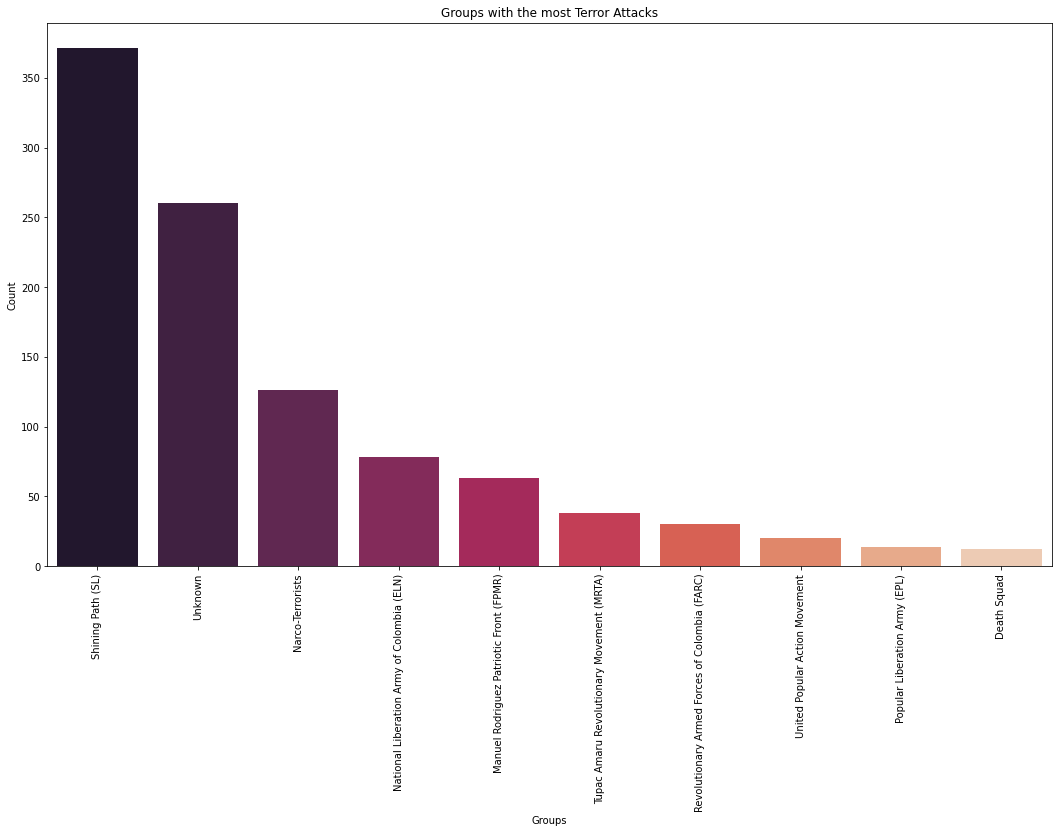

In [310]:
#Top Groups with the most Terror Attacks
plt.subplots(figsize=(18,10))
sns.barplot(filterData['Group'].value_counts()[:10].index, filterData['Group'].value_counts()[:10], palette='rocket')
plt.title('Groups with the most Terror Attacks')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.savefig('top10_TerroristGroups.png')
plt.show()

## Type of Attacks that Resulted in Death

In [311]:
attackData = filterData.loc[:,'attacktype1':'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [312]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping)
Killed,1119.0,438.0,210.0,6.0,1.0,0.0,87.0


In [313]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
dtypes: float64(7)
memory usage: 64.0+ bytes


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


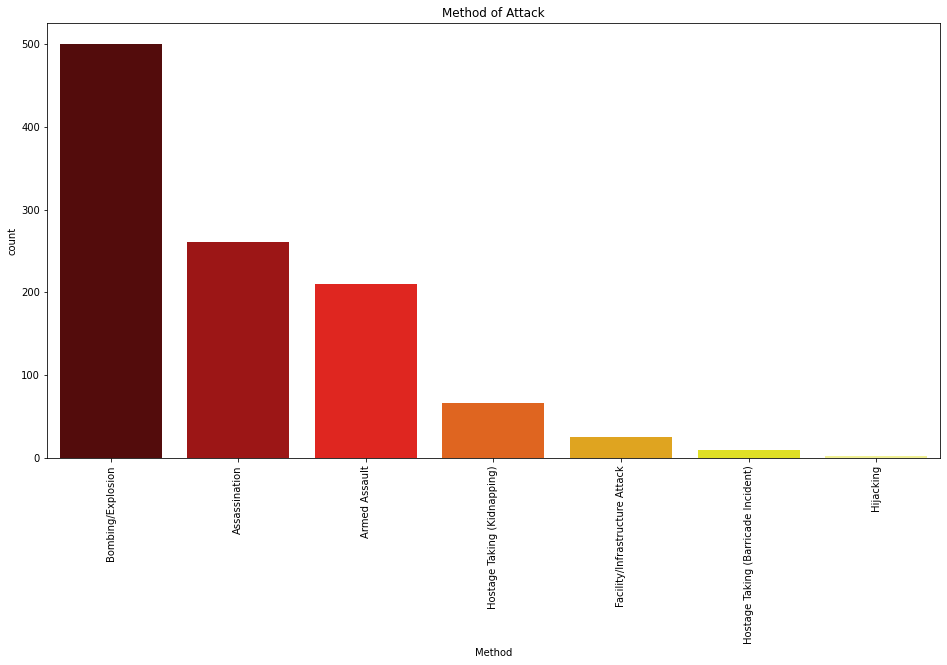

In [314]:
plt.figure(figsize=(16,8))
sns.countplot(filterData['AttackType'], order=filterData['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.savefig('top_AttackTypes.png')
plt.show()

In [315]:
#countryData = Terrorism.loc[:,'country':'country_txt']
countryData = SouthAmericaData.loc[:,'country':'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [316]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

#SouthAmericaData

Country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Falkland Islands,French Guiana,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela
Killed,1.0,6.0,3.0,8.0,694.0,3.0,0.0,0.0,0.0,0.0,1146.0,0.0,0.0,0.0


In [317]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Argentina         1 non-null      float64
 1   Bolivia           1 non-null      float64
 2   Brazil            1 non-null      float64
 3   Chile             1 non-null      float64
 4   Colombia          1 non-null      float64
 5   Ecuador           1 non-null      float64
 6   Falkland Islands  1 non-null      float64
 7   French Guiana     1 non-null      float64
 8   Guyana            1 non-null      float64
 9   Paraguay          1 non-null      float64
 10  Peru              1 non-null      float64
 11  Suriname          1 non-null      float64
 12  Uruguay           1 non-null      float64
 13  Venezuela         1 non-null      float64
dtypes: float64(14)
memory usage: 120.0+ bytes


In [318]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

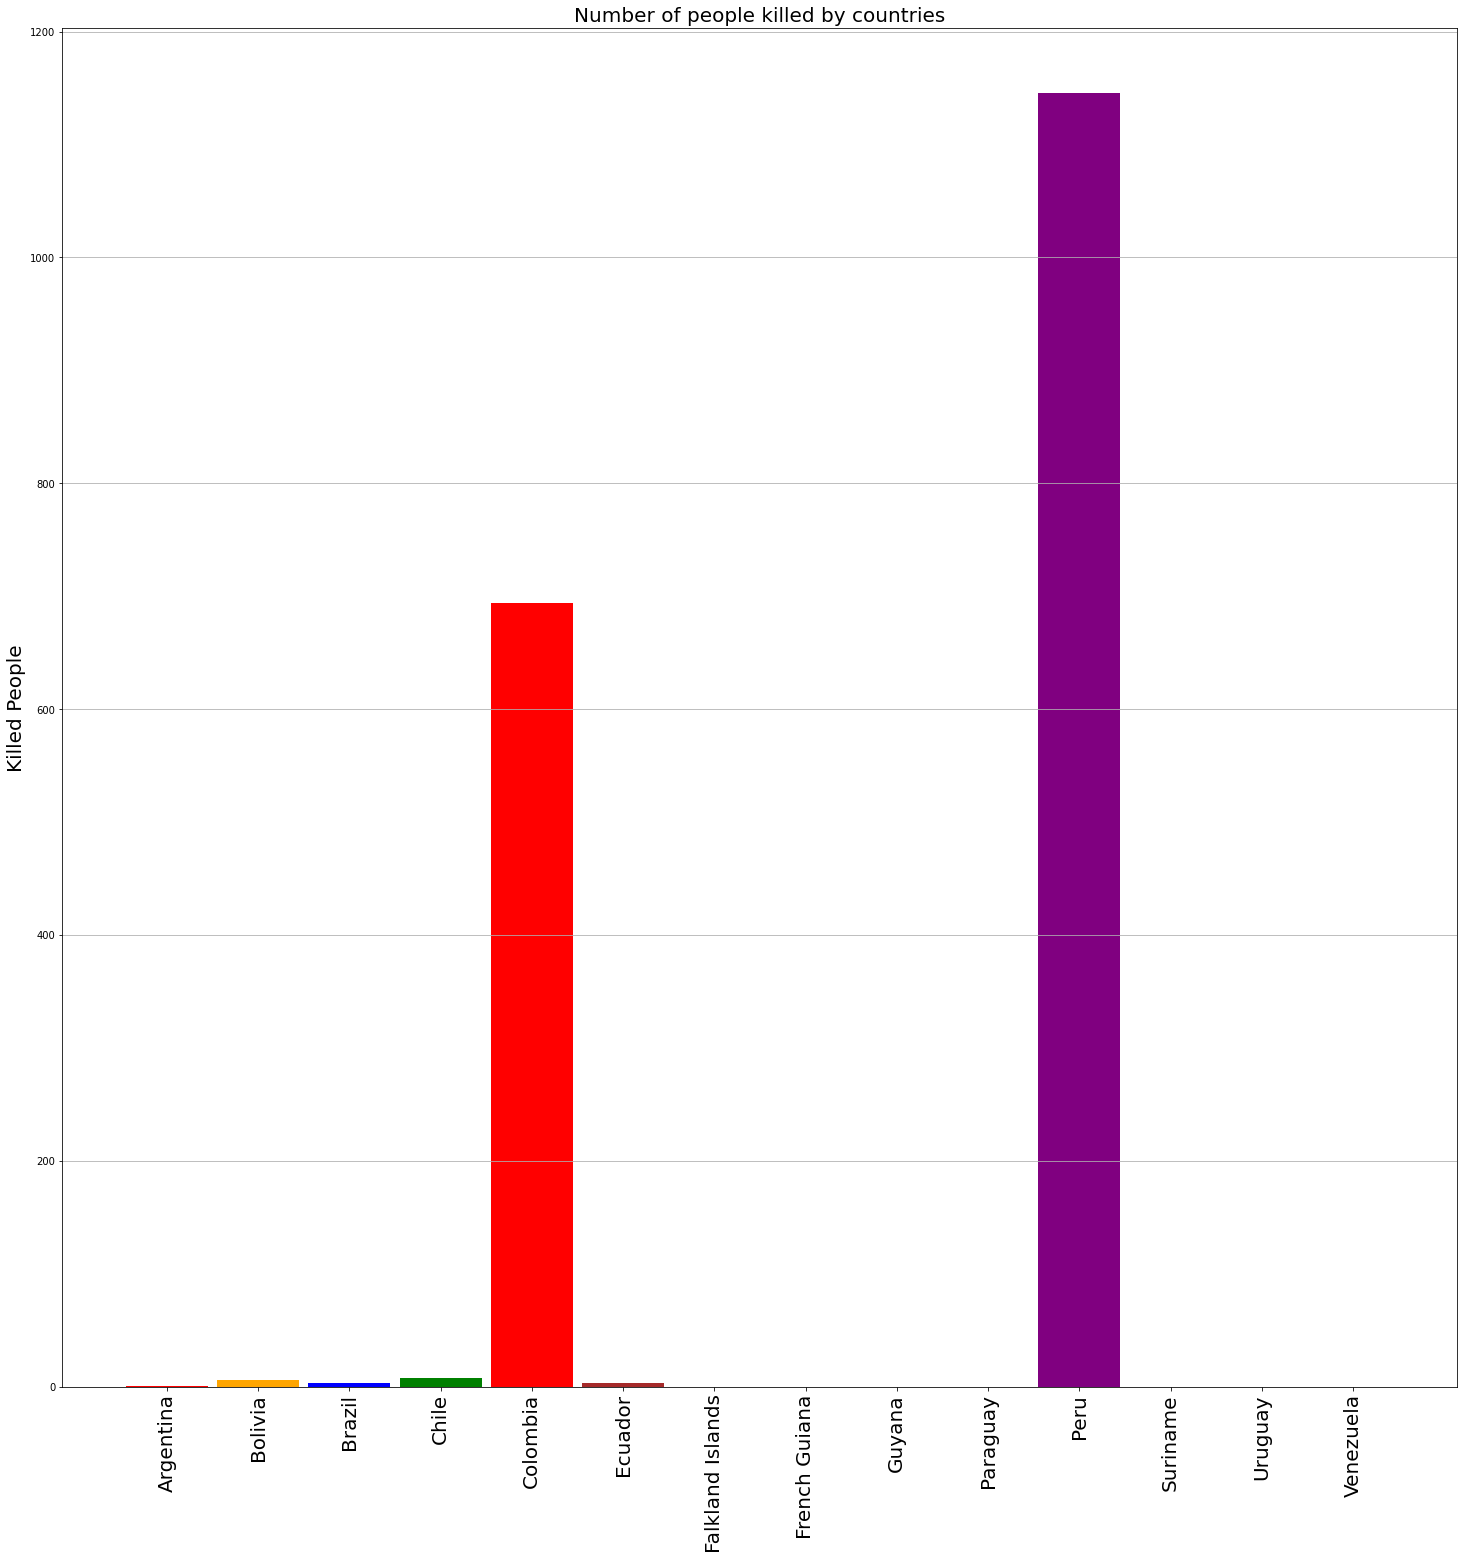

In [319]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] 
colors = ['red', 'orange', 'blue', 'green', 'red', 'brown', 'black', 'yellow', 'yellow', 'purple', 'purple'] 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of people killed by countries', fontsize =20)
# print(fig_size)
plt.show()



### Terrorist acts in South America in the 1990s have been predominantly in Colombia and Peru. The most common type of terrorist attacks in the 1990s were by explosion, assasination, and armed assult. All of the countries that have been most affected by terrorism attacks in the 1990's reflect the same time period of the transatlantic cocain market.